<a href="https://colab.research.google.com/github/iznue/data_analysis/blob/main/practice7_Apriori_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 작업을 위한 기본 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
# 런타임 다시 시작
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**지지도 신뢰도 향상도 연산**

In [4]:
# 임의의 데이터셋 제작

dataset  = [['사과', '치즈', '생수'],
            ['생수', '호두', '치즈', '고등어'],
            ['수박', '사과', '생수'],
            ['생수', '호두', '치즈', '옥수수']]

type(dataset)
# numpy와 list의 차이
# list는 들어가는 데이터의 길이가 서로 달라도 됨
# 자료 안에 들어가는 데이터 값이 숫자여도 상관 없음 (각 워소 형이 달라도 됨)
# 사진과 같은 이미지 자료는 numpy array로 사용 -> 가로 세로가 같아야 하므로

list

In [5]:
# 리스트 자료 -> 연관분석 셋으로 전환

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
# mlxtend.preprocessing, mlxtend.frequent_patterns : 연관분석을 사용하기 위한 모듈

te = TransactionEncoder() # 모듈의 데이터의 객체를 받음
te.fit(dataset) # 데이터셋 피팅
# 데이터의 중복성을 제거하고 유일한 값으로 표현하고, true false 값을 이용해 표를 만듦
print(te.columns_)

te_ary = te.fit(dataset).transform(dataset)
te_ary
# 연관분석에서는 물품의 발생 횟수는 중요하지 않음 -> 해당 품목이 포함되어 있는지만 확인
# 고객의 발생 빈도가 중요함 

['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두']


array([[False,  True,  True, False, False,  True, False],
       [ True, False,  True, False, False,  True,  True],
       [False,  True,  True,  True, False, False, False],
       [False, False,  True, False,  True,  True,  True]])

In [6]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df
# te.columns_를 열 이름으로 가져옴
# array data를 value값으로 가져옴

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [7]:
# 지지도 계산 (빈도 수)

frequent_itemsets = apriori(df, use_colnames=True)
frequent_itemsets
# true false는 1또는 0으로 계산하므로 현재 갖고 있는 자료에서 / (sum)을 하면 빈도수가 출력됨
# numpy에서 제공하는 것을 이용하면 계산이 더 빨라짐

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(사과, 생수)"
5,0.75,"(치즈, 생수)"
6,0.50,"(호두, 생수)"
7,0.50,"(치즈, 호두)"
8,0.50,"(치즈, 호두, 생수)"


In [8]:
# 지지도 하한선 결정

frequent_itemsets = apriori(df, min_support=0.0, use_colnames=True)
frequent_itemsets

# 모든 경우의 수 : 127

,support,itemsets
0,0.25,(고등어)
1,0.50,(사과)
2,1.00,(생수)
3,0.25,(수박)
4,0.25,(옥수수)
...,...,...
122,0.00,"(옥수수, 치즈, 호두, 고등어, 사과, 생수)"
123,0.00,"(옥수수, 치즈, 호두, 고등어, 사과, 수박)"
124,0.00,"(옥수수, 치즈, 호두, 고등어, 수박, 생수)"
125,0.00,"(옥수수, 치즈, 호두, 수박, 사과, 생수)"


In [9]:
# item 조합 갯수가 특정갯수 이상의 item만 추출

print(frequent_itemsets[:8])
print(frequent_itemsets['itemsets'][0])
print(len(frequent_itemsets['itemsets'][7]))
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
# len(x)길이 값을 이용해 작업
# itemsets에 들어가는 갯수를 받아서 결과값을 length에 넣어줌
frequent_itemsets[frequent_itemsets['length'] >= 2] # 데이터 조합에 제약을 넣음 (2개 이상만 넣음)
# frozenset은 setdata와 같이 indexing이 불가함, set데이터는 객체 변경 가능
# 하지만 frozenset은 객체 변경 불가함

   support   itemsets
0     0.25      (고등어)
1     0.50       (사과)
2     1.00       (생수)
3     0.25       (수박)
4     0.25      (옥수수)
5     0.75       (치즈)
6     0.50       (호두)
7     0.00  (사과, 고등어)
frozenset({'고등어'})
2


,support,itemsets,length
7,0.00,"(사과, 고등어)",2
8,0.25,"(생수, 고등어)",2
9,0.00,"(수박, 고등어)",2
10,0.00,"(옥수수, 고등어)",2
11,0.25,"(치즈, 고등어)",2
...,...,...,...
122,0.00,"(옥수수, 치즈, 호두, 고등어, 사과, 생수)",6
123,0.00,"(옥수수, 치즈, 호두, 고등어, 사과, 수박)",6
124,0.00,"(옥수수, 치즈, 호두, 고등어, 수박, 생수)",6
125,0.00,"(옥수수, 치즈, 호두, 수박, 사과, 생수)",6


In [10]:
# 특정 아이템이 포함된 것만 추출 (ex : 치즈)

frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: '치즈' in x)]

,support,itemsets,length
5,0.75,(치즈),1
11,0.25,"(치즈, 고등어)",2
16,0.25,"(사과, 치즈)",2
20,0.75,"(치즈, 생수)",2
23,0.00,"(치즈, 수박)",2
...,...,...,...
122,0.00,"(옥수수, 치즈, 호두, 고등어, 사과, 생수)",6
123,0.00,"(옥수수, 치즈, 호두, 고등어, 사과, 수박)",6
124,0.00,"(옥수수, 치즈, 호두, 고등어, 수박, 생수)",6
125,0.00,"(옥수수, 치즈, 호두, 수박, 사과, 생수)",6


In [11]:
from mlxtend.frequent_patterns import apriori, association_rules
# association_rules : 절대 데이터를 보여줌

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
rules
# confidence의 최소값은 0.1이상이어야 함

# matric에는 지지도(support), 신뢰도(confidence), 향상도(lift) 사용가능
# 값의 최소옵션은 min_threshold에 기입
# antecedents : 전례 (x값), consequents : 결과 (y값)

# lift 값이 1이상인 것을 원함

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:105: RuntimeWarning: invalid value encountered in double_scalars
  "confidence": lambda sAC, sA, _: sAC/sA,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
1,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
4,(호두),(고등어),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
...,...,...,...,...,...,...,...,...,...
103,"(호두, 생수)","(치즈, 옥수수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
104,(치즈),"(생수, 호두, 옥수수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
105,(옥수수),"(치즈, 호두, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
106,(생수),"(치즈, 호두, 옥수수)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000


In [12]:
rules['antecedents'][0]

frozenset({'생수'})

In [13]:
rules[(rules.iloc[:,0]==frozenset({'사과'})) | (rules.iloc[:,1]==frozenset({'사과'}))]
# 반드시 자료 셋까지 포함하여 데이터를 넣어줘야함 
# iloc로 0번째 1번째에 있는 열 필드 지정

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
7,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.00
8,(사과),(수박),0.50,0.25,0.25,0.500000,2.000000,0.125,1.50
9,(수박),(사과),0.25,0.50,0.25,1.000000,2.000000,0.125,inf
10,(사과),(치즈),0.50,0.75,0.25,0.500000,0.666667,-0.125,0.50
11,(치즈),(사과),0.75,0.50,0.25,0.333333,0.666667,-0.125,0.75
46,"(생수, 수박)",(사과),0.25,0.50,0.25,1.000000,2.000000,0.125,inf
47,(사과),"(생수, 수박)",0.50,0.25,0.25,0.500000,2.000000,0.125,1.50
52,"(치즈, 생수)",(사과),0.75,0.50,0.25,0.333333,0.666667,-0.125,0.75
53,(사과),"(치즈, 생수)",0.50,0.75,0.25,0.500000,0.666667,-0.125,0.50


In [14]:
# 각 항목별로 lift가 가장 큰 순서로 정렬
te.columns_
for i in te.columns_:
    #display(rules[rules.antecedents == {i}].sort_values(by = 'lift', ascending=False))
    tmp=rules[rules.antecedents == {i}].sort_values(by = 'lift', ascending=False)
    tmp.to_csv('/content/sample_data/practice_apriori_algorithm/'+ i + '.csv')

In [15]:
# lift 값이 가장 큰 값
rules[rules.antecedents == {'사과'}].sort_values(by = 'lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(사과),(수박),0.5,0.25,0.25,0.5,2.000000,0.125,1.5
47,(사과),"(생수, 수박)",0.5,0.25,0.25,0.5,2.000000,0.125,1.5
6,(사과),(생수),0.5,1.00,0.50,1.0,1.000000,0.000,inf
10,(사과),(치즈),0.5,0.75,0.25,0.5,0.666667,-0.125,0.5
53,(사과),"(치즈, 생수)",0.5,0.75,0.25,0.5,0.666667,-0.125,0.5


In [16]:
# 특정 단어가 있는 자료 필터링
rules[rules.antecedents.apply(lambda x: '생수' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
7,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.0000,1.000
12,(생수),(수박),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
15,(생수),(옥수수),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
17,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.0000,1.000
19,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.0000,1.000
26,"(치즈, 생수)",(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
28,"(생수, 고등어)",(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
30,(생수),"(치즈, 고등어)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
32,"(호두, 생수)",(고등어),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500


import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') import matplotlib.pyplot as plt

pl.rc('font', family='NanumBarunGothic') import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') import matplotlib.pyplot as plt

plt.rc('font', family='Nanumimport matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic'**다른 모듈로 동일 알고리즘 진행**

In [17]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
dataset  = [['사과', '치즈', '생수'],
            ['생수', '호두', '치즈', '고등어'],
            ['수박', '사과', '생수'],
            ['생수', '호두', '치즈', '옥수수']]

dataset

[['사과', '치즈', '생수'],
 ['생수', '호두', '치즈', '고등어'],
 ['수박', '사과', '생수'],
 ['생수', '호두', '치즈', '옥수수']]

In [19]:
from apyori import apriori
result=(list(apriori(dataset, min_support=0.01)))
df=pd.DataFrame(result)
df[:5]
# dictionary 구조로 데이터가 들어감

,items,support,ordered_statistics
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]"
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]"
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]"
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]"
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]"


**네트워크 그래프 그리기**

In [20]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
dataset  = [['사과', '치즈', '생수'],
            ['생수', '호두', '치즈', '고등어'],
            ['수박', '사과', '생수'],
            ['생수', '호두', '치즈', '옥수수']]

from apyori import apriori
result=(list(apriori(dataset, min_support=0.01)))
df=pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length']==2) & (df['support'] >= 0.01)].sort_values(by='support', ascending=False)

ar=(df['items'])
ar
# graph와 node를 이용한 관계도

15     (치즈, 생수)
10     (사과, 생수)
16     (호두, 생수)
19     (치즈, 호두)
7     (생수, 고등어)
8     (치즈, 고등어)
9     (호두, 고등어)
11     (사과, 수박)
12     (사과, 치즈)
13     (생수, 수박)
14    (옥수수, 생수)
17    (치즈, 옥수수)
18    (호두, 옥수수)
Name: items, dtype: object

In [22]:
# python networkx는 link analysis 알고리즘의 일부로 PageRank 알고리즘을 구현함
# 데이터가 들어오고 나가는 방향을 기반으로 page in out을 구현
# 계산된 숫자 값을 이용해 node의 크기 또는 link 길이 결정

import networkx as nx
g=nx.Graph()
g.add_edges_from(ar) # item 부분을 그래프에 할당

import numpy as np
pr=nx.pagerank(g) # 추가된 그래프를 pagerank 알고리즘을 통해 숫자값으로 받음
pr

# 생수가 가장 값이 크므로 '지지도'가 될 것이라 예상 가능

{'치즈': 0.18532343446984545,
 '생수': 0.22245604244398662,
 '사과': 0.12159024355676397,
 '호두': 0.15041449694333728,
 '고등어': 0.1164109600759886,
 '수박': 0.08739386243408954,
 '옥수수': 0.1164109600759886}

In [23]:
pr=nx.pagerank(g) # graph node 값을 가져옴
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))
# 데이터를 일정 범위로 스케일링함, 표준화
print(nsize)

[1450.1405505  2000.          506.37981884  933.20920045  429.68501826
    0.          429.68501826]


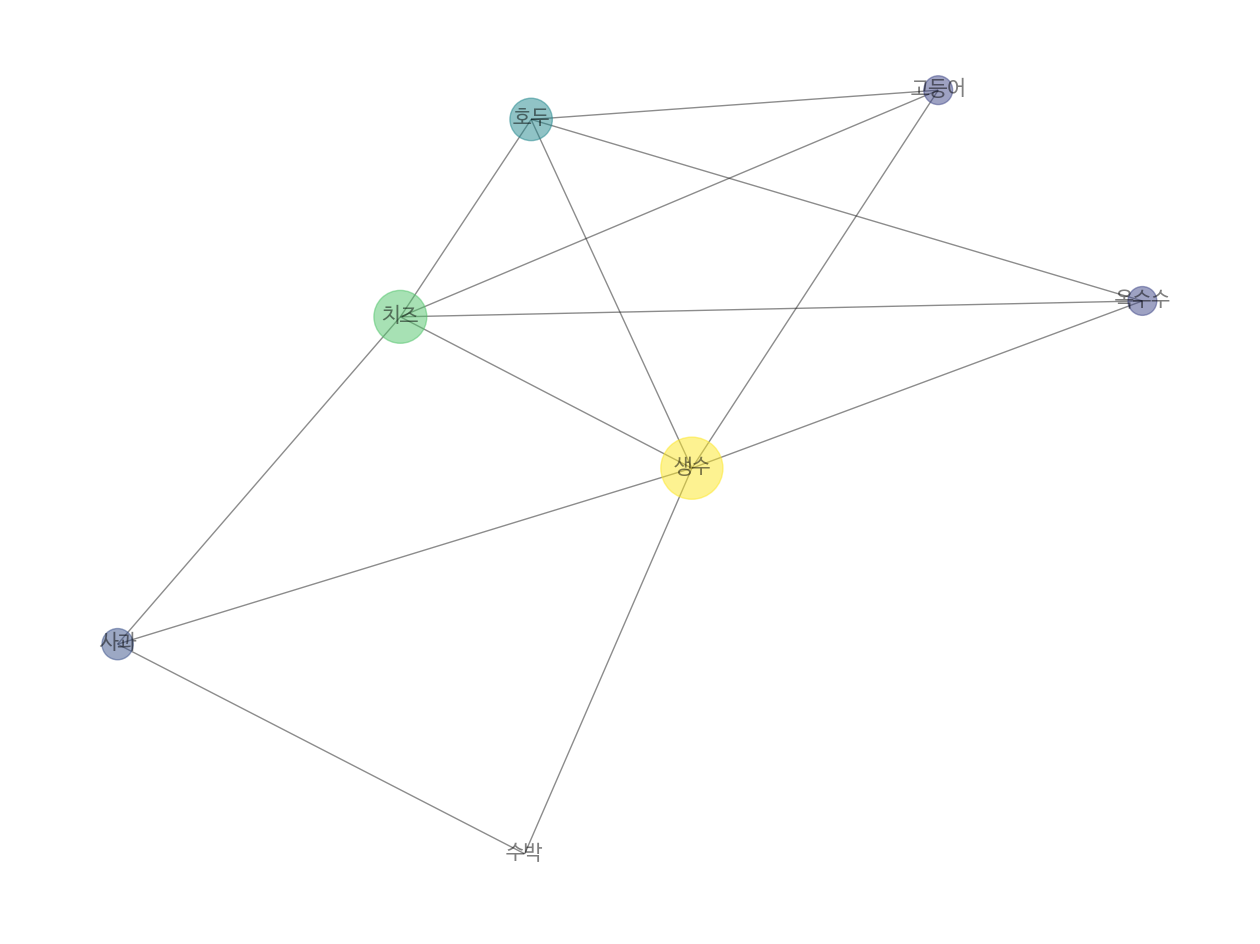

In [24]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(16,12)); plt.axis('off')

fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(g,  node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)

**연관분석 실전**

In [26]:
# 베이커리에서 판매된 상품의 트랜잭션 기록 데이터
# data(판매일자), time(판매시간), transaction(고객번호), item(판매상품) : 변수
# 판매일자 : 2016.10.30~2017.04.09
# https://www.kaggle.com/datasets/sulmansarwar/transactions-from-a-bakery?resource=download

df=pd.read_csv('/content/sample_data/practice_apriori_algorithm/BreadBasket_DMS.csv')
df.head()


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [28]:
df.isna().sum() # null data 확인

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [29]:
# 판매빈도수 상위 15개 
tmp=df['Item'].value_counts()[:15]
tmp

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Name: Item, dtype: int64

<BarContainer object of 15 artists>

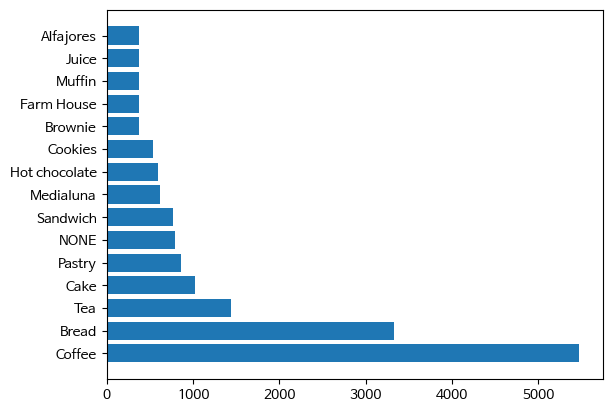

In [30]:
# 판매빈도수 상위 15개 차트
import matplotlib.pyplot as plt
plt.barh(tmp.index,tmp)

Coffee           0.256939
Bread            0.156155
Tea              0.067393
Cake             0.048138
Pastry           0.040201
NONE             0.036914
Sandwich         0.036209
Medialuna        0.028930
Hot chocolate    0.027709
Cookies          0.025360
Brownie          0.017799
Farm House       0.017564
Muffin           0.017377
Juice            0.017330
Alfajores        0.017330
Name: Item, dtype: float64


<BarContainer object of 15 artists>

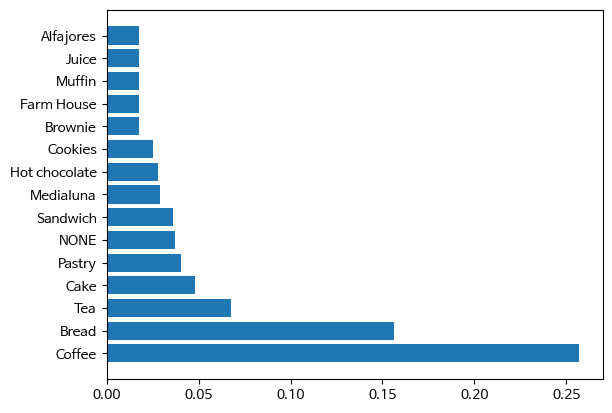

In [31]:
# 판매빈도수 상위15개 % 계산 및 차트
tmp=df['Item'].value_counts()
tmp1=tmp[:15]/len(df)
print(tmp1)

plt.barh(tmp1.index,tmp1)

In [32]:
# 요일 및 시간별 트랜잭션 분포 확인
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 665.5+ KB


In [33]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day_name']=df['Date'].dt.day_name()
df['hour']=df['Time'].str.split(':').str[0].astype(int)
df.head()

,Date,Time,Transaction,Item,year,month,day_name,hour
0,2016-10-30,09:58:11,1,Bread,2016,10,Sunday,9
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,Sunday,10
4,2016-10-30,10:07:57,3,Jam,2016,10,Sunday,10


<Axes: xlabel='hour', ylabel='count'>

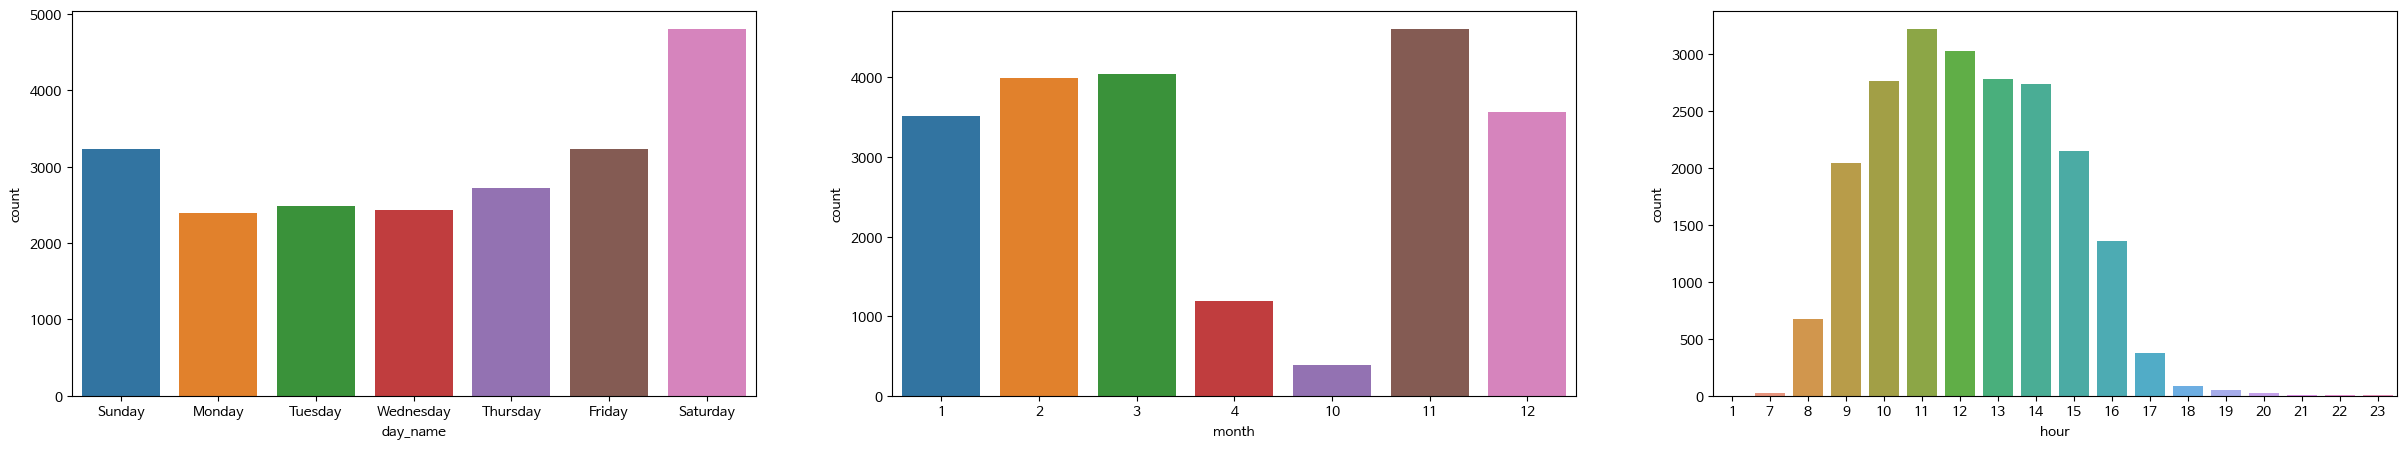

In [34]:
#########################################################
## 베이커리의 손님 대부분이 토요일에 손님 많음
##  데이터가 2016.10.30 - 2017.04.09 사이의 데이터이기 때문에 4월과 10월의 데이터가 적을 수 밖에 없음
## 오전 8시에서 오후 5시 사이에 분포함을 볼 수 있으며, 특히 오전 11시 경에 손님이 가장 분빔
########################################################
plt.figure(figsize=(30,5))
import seaborn as sns

plt.subplot(1,3,1)
sns.countplot(x='day_name',data=df)


plt.subplot(1,3,2)
sns.countplot(x='month',data=df)


plt.subplot(1,3,3)
sns.countplot(x='hour',data=df)

In [35]:
# 연관분석 데이터셋으로 변환 (transaction encoder에 사용될 수 있는 list 구조로 변환)
# 고객 번호 최대값 확인

cnt=df['Transaction'].max()
cnt
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
 4   year         21293 non-null  int64         
 5   month        21293 non-null  int64         
 6   day_name     21293 non-null  object        
 7   hour         21293 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.3+ MB


In [38]:
# 데이터 프레임 list로 변경
df_tmp=df[['Transaction','Item']]
df_tmp_arr=[[]for i in range(cnt+1)]
num=0

for i in df_tmp['Item'] :
    df_tmp_arr[df_tmp['Transaction'][num]].append(i)
    num+=1
df_tmp_arr[:5]

[[],
 ['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin']]

In [39]:
df[df['Transaction']==5]

,Date,Time,Transaction,Item,year,month,day_name,hour
7,2016-10-30,10:13:03,5,Coffee,2016,10,Sunday,10
8,2016-10-30,10:13:03,5,Pastry,2016,10,Sunday,10
9,2016-10-30,10:13:03,5,Bread,2016,10,Sunday,10


In [40]:
df_tmp_arr.pop(0)
num=0
for i in df_tmp_arr :
    df_tmp_arr[num] = list(set(df_tmp_arr[num]))  
    # set은 중복제거하는 파이썬 내부명령어, 인덱싱이 불가능해서 list구조로 변경해야함
    num+=1
df_tmp_arr[:15]

[['Bread'],
 ['Scandinavian'],
 ['Jam', 'Cookies', 'Hot chocolate'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Coffee', 'Pastry', 'Tea'],
 ['Pastry', 'Bread'],
 ['Muffin', 'Bread'],
 ['Medialuna', 'Scandinavian'],
 ['Medialuna', 'NONE', 'Bread'],
 ['Coffee', 'Pastry', 'Jam', 'Tea', 'Tartine'],
 ['Basket', 'Coffee', 'Bread'],
 ['Medialuna', 'Pastry', 'Bread'],
 ['Mineral water', 'Scandinavian', 'NONE']]

In [41]:
# 연관규칙 생성
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(df_tmp_arr).transform(df_tmp_arr)
df = pd.DataFrame(te_ary, columns=te.columns_)
len(df.columns)

95

In [42]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.319806,(Bread)
1,0.101508,(Cake)
2,0.467575,(Coffee)
3,0.139405,(Tea)


In [43]:
support_list=[0.005, 0.01, 0.05, 0.1]
con_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


total=[]
for i in support_list:
  frequent_itemsets = apriori(df, min_support=i, use_colnames=True)
  row=[]
  for j in con_list:
    tmp= association_rules(frequent_itemsets, metric="confidence", min_threshold=j)
    row.append(len(tmp))
  total.append(row)
total

[[118, 61, 38, 28, 19, 4, 2, 1, 0],
 [42, 30, 18, 15, 12, 1, 1, 0, 0],
 [4, 2, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [44]:
total[0]

[118, 61, 38, 28, 19, 4, 2, 1, 0]

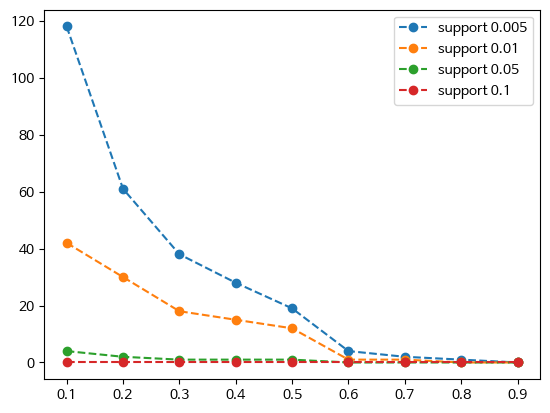

In [45]:
###################################################
## 지지도 10%, 5%의 경우 생성되는 규칙이 매우 적음 
##  지지도 0.5%의 경우 생성되는 규칙이 너무 많음
##  적정선인 지지도 1%를 선택하고자함.  
## 최소 50%의 신뢰도에서 15개 정도의 규칙이 생성되므로 
## 그 이상으로 신뢰도를 선택하고자함.
####################################################

con_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
support_list=[0.005, 0.01, 0.05, 0.1]

for y,name in zip(total,support_list):

  plt.plot(con_list,y,'o',linestyle='dashed', label='support ' + str(name))
  plt.legend()

In [46]:
################################################################################
### 최소 지지도 1%(0.01), 최소 신뢰도 50%(0.05) 이상인 연관 규칙들을 생성
################################################################################

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
rules= association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Bread),0.035523,0.319806,0.010120,0.284884,0.890802,-0.001241,0.951166
1,(Alfajores),(Coffee),0.035523,0.467575,0.019207,0.540698,1.156386,0.002597,1.159203
2,(Brownie),(Bread),0.039137,0.319806,0.010533,0.269129,0.841540,-0.001983,0.930663
3,(Cake),(Bread),0.101508,0.319806,0.022821,0.224822,0.702995,-0.009642,0.877468
4,(Bread),(Cake),0.319806,0.101508,0.022821,0.071359,0.702995,-0.009642,0.967535


In [47]:
# 연관규칙 해석 및 차트 작성
# 신뢰도값으로 확인
rules.sort_values(by='confidence', ascending=False)[:10]

# 해석
# Toast를 산 손님의 70%가(confidence)가 coffe를 구매하였음
# spanish Brunch 산 손님의 60%가 coffee를 구매하였음.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,(Toast),(Coffee),0.032838,0.467575,0.023131,0.704403,1.506500,0.007777,1.801181
42,(Spanish Brunch),(Coffee),0.017761,0.467575,0.010636,0.598837,1.280729,0.002331,1.327203
31,(Medialuna),(Coffee),0.060409,0.467575,0.034387,0.569231,1.217410,0.006141,1.235986
37,(Pastry),(Coffee),0.084159,0.467575,0.046468,0.552147,1.180873,0.007118,1.188839
1,(Alfajores),(Coffee),0.035523,0.467575,0.019207,0.540698,1.156386,0.002597,1.159203
30,(Juice),(Coffee),0.037691,0.467575,0.020136,0.534247,1.142589,0.002513,1.143147
35,(NONE),(Coffee),0.077757,0.467575,0.041409,0.532537,1.138932,0.005051,1.138965
39,(Sandwich),(Coffee),0.070219,0.467575,0.037381,0.532353,1.138539,0.004549,1.138518
20,(Cake),(Coffee),0.101508,0.467575,0.053490,0.526958,1.127002,0.006028,1.125534
40,(Scone),(Coffee),0.033767,0.467575,0.017658,0.522936,1.118399,0.001869,1.116044


In [48]:
# 향상도값으로 확인
rules.sort_values(by='lift', ascending=False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
23,(Hot chocolate),(Cake),0.057001,0.101508,0.011152,0.195652,1.927463,0.005366,1.117045
22,(Cake),(Hot chocolate),0.101508,0.057001,0.011152,0.109868,1.927463,0.005366,1.059392
47,(Tea),(NONE),0.139405,0.077757,0.017968,0.128889,1.657583,0.007128,1.058697
46,(NONE),(Tea),0.077757,0.139405,0.017968,0.231076,1.657583,0.007128,1.119219
25,(Tea),(Cake),0.139405,0.101508,0.023234,0.166667,1.641913,0.009084,1.078191
24,(Cake),(Tea),0.101508,0.139405,0.023234,0.228891,1.641913,0.009084,1.116048
45,(Toast),(Coffee),0.032838,0.467575,0.023131,0.704403,1.506500,0.007777,1.801181
53,(Pastry),"(Coffee, Bread)",0.084159,0.087980,0.010946,0.130061,1.478303,0.003542,1.048373
51,"(Coffee, Bread)",(Pastry),0.087980,0.084159,0.010946,0.124413,1.478303,0.003542,1.045973
49,(Sandwich),(Tea),0.070219,0.139405,0.014044,0.200000,1.434667,0.004255,1.075743


In [49]:
!pip install apyori
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) 
tmp=frequent_itemsets[frequent_itemsets['length'] ==2] 
tmp

,support,itemsets,length
31,0.010120,"(Alfajores, Bread)",2
32,0.019207,"(Alfajores, Coffee)",2
33,0.010533,"(Brownie, Bread)",2
34,0.022821,"(Cake, Bread)",2
35,0.087980,"(Coffee, Bread)",2
36,0.014147,"(Bread, Cookies)",2
37,0.013114,"(Bread, Hot chocolate)",2
38,0.016522,"(Medialuna, Bread)",2
39,0.020240,"(NONE, Bread)",2
40,0.028501,"(Pastry, Bread)",2


In [51]:
ar=tmp['itemsets']

import networkx as nx
G=nx.Graph()
G.add_edges_from(ar)


import numpy as  np
pr=nx.pagerank(G)
pr

{'Alfajores': 0.03401795402080666,
 'Bread': 0.15867559974217835,
 'Coffee': 0.2684748359987527,
 'Brownie': 0.03401795402080666,
 'Cake': 0.05965950792278901,
 'Cookies': 0.03401795402080666,
 'Hot chocolate': 0.04669568599129706,
 'Medialuna': 0.03401795402080666,
 'NONE': 0.046428929913718595,
 'Pastry': 0.03401795402080666,
 'Sandwich': 0.046428929913718595,
 'Tea': 0.07300575165494495,
 'Juice': 0.02175683145976124,
 'Muffin': 0.02175683145976124,
 'Scone': 0.02175683145976124,
 'Soup': 0.02175683145976124,
 'Spanish Brunch': 0.02175683145976124,
 'Toast': 0.02175683145976124}

In [52]:
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))
print(len(nsize))

18


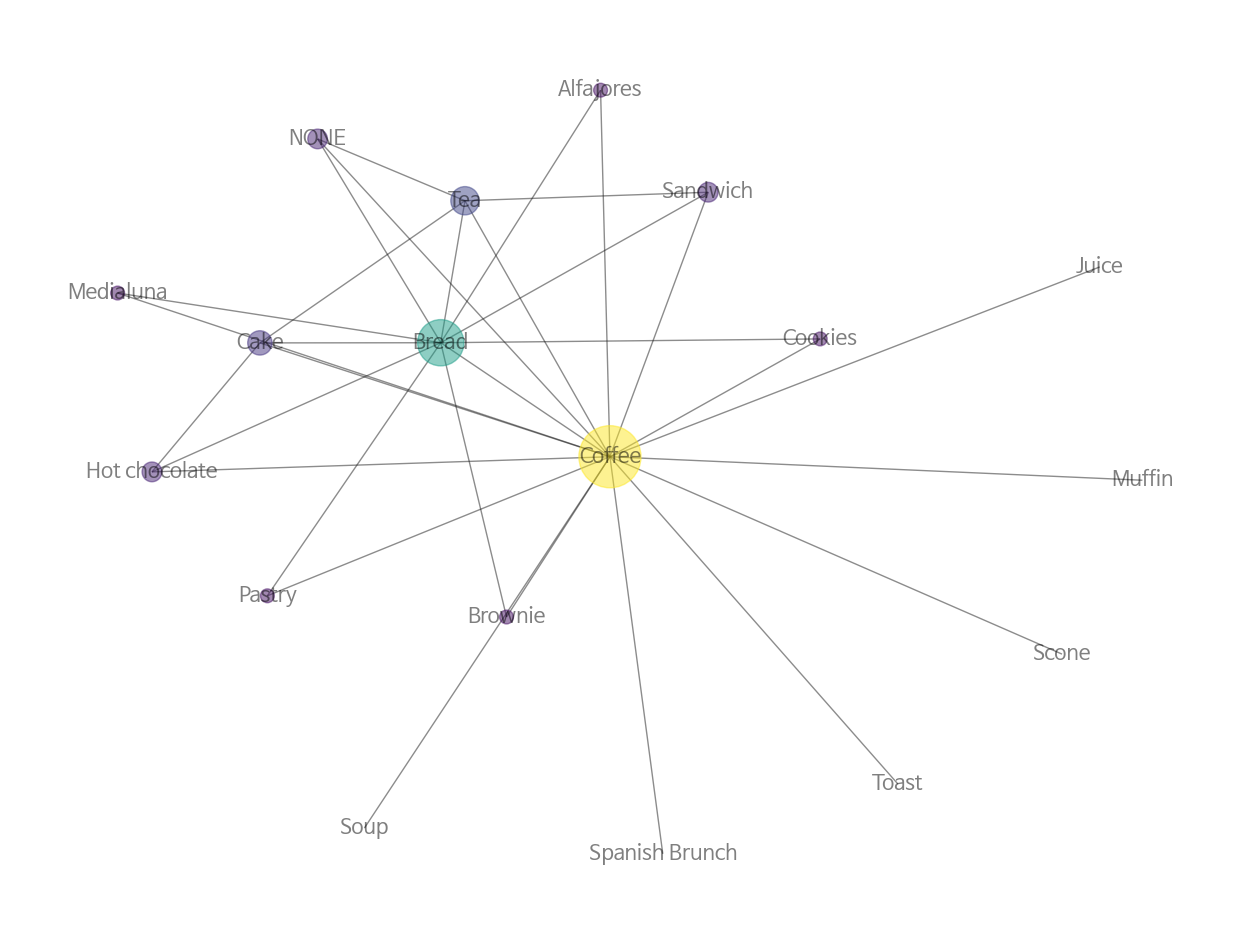

In [53]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(16,12)); plt.axis('off')

fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)